In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = cv2.imread('PCB.jpg')
#image = cv2.imread('5.jpg')
#image = cv2.imread('fruits.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Grayscale Image')

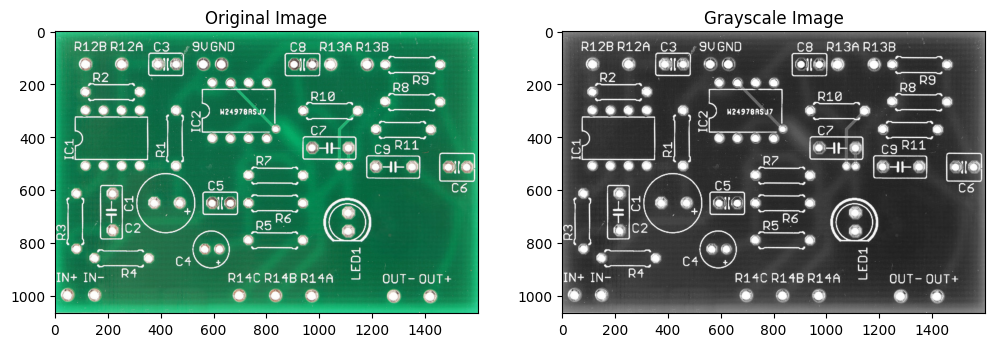

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(image_gray, cmap='gray')
ax[1].set_title('Grayscale Image')


In [4]:
# Histogram for Grayscale Image
# [image], [channels], mask, [histSize], [ranges]

# Create a mask: a white square on black background
# The histogram will be calculated only for the white area (could of course also be a circle etc.)
mask = np.zeros(image_gray.shape, dtype=np.uint8)
mask[50:100, 50:100] = 255
#hist = cv2.calcHist([image_gray], [0], mask, [256], [0, 256])

# Histsize = number of bins: 256 bins = one for each grey value / intensity value
# cv2 can only do equal sized bins

# range: which intensity values to consider

grey_hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
print(grey_hist.shape)  # (256, 1) = 256 bins one count column, 
# grey_hist[intensity_value] = count
print(grey_hist) 

(256, 1)
[[0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [2.0000e+00]
 [2.0000e+00]
 [0.0000e+00]
 [6.0000e+00]
 [4.0000e+00]
 [2.0000e+00]
 [1.0000e+00]
 [3.0000e+00]
 [9.0000e+00]
 [1.0000e+01]
 [5.0000e+00]
 [1.4000e+01]
 [2.3000e+01]
 [2.7000e+01]
 [4.1000e+01]
 [7.5000e+01]
 [1.0600e+02]
 [1.7600e+02]
 [2.7400e+02]
 [4.2100e+02]
 [7.7500e+02]
 [1.5570e+03]
 [3.7620e+03]
 [7.8720e+03]
 [1.3768e+04]
 [2.1327e+0

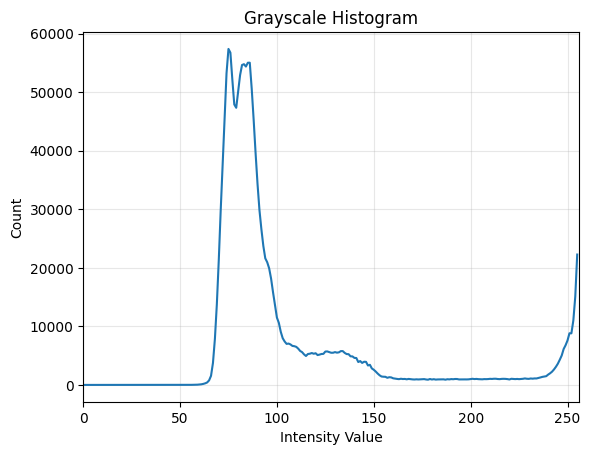

In [5]:
plt.plot(grey_hist)
plt.title('Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.xlim([0, 256])
plt.grid(True, alpha=0.3)

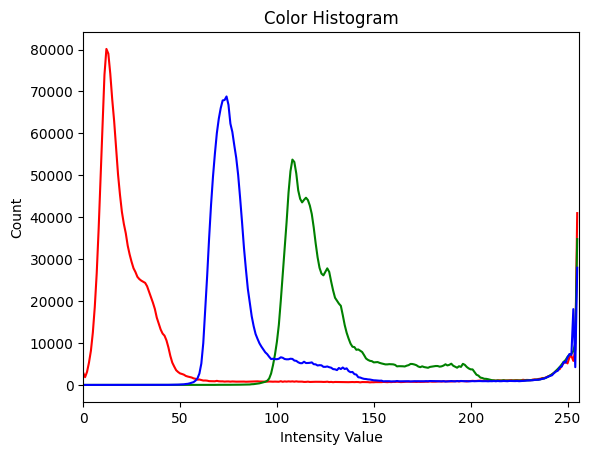

In [6]:
for channel, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.xlim([0, 256])

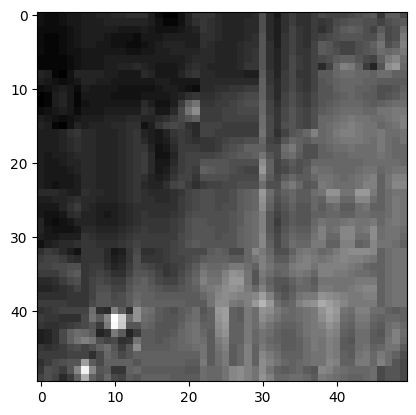

In [7]:
image_subsample = image_gray[200:250, 450:500]  
plt.imshow(image_subsample, cmap='gray')

Text(0.5, 1.0, 'Smoothed Subsample')

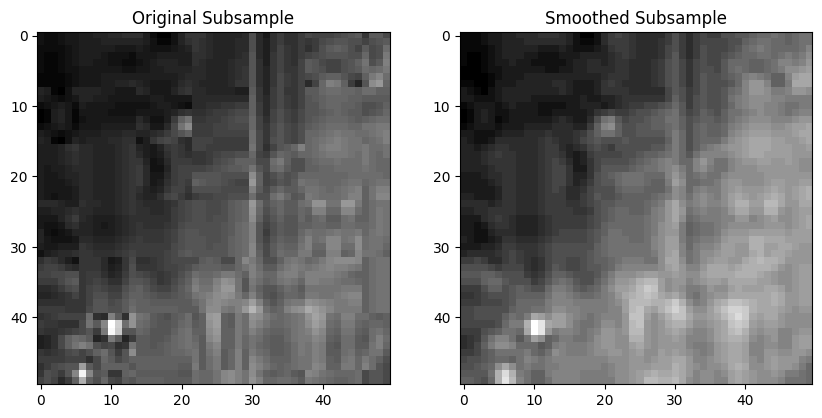

In [8]:
# smoothing
# Kernel that gives more weight to the central pixel and less to the surrounding ones, and least to the corner ones
smoothing_kernel = np.array([
    [1/16, 1/8, 1/16],
    [1/8,  1/4, 1/8],
    [1/16, 1/8, 1/16]
    ], dtype=np.float32)
# Apply the kernel to the image
# ddepth -1 means same depth (= data type, e.g. uint8) as source image
smoothed_image = cv2.filter2D(src=image_subsample, ddepth=-1, kernel=smoothing_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_subsample, cmap='gray')
axes[0].set_title('Original Subsample')
axes[1].imshow(smoothed_image, cmap='gray')
axes[1].set_title('Smoothed Subsample')

Text(0.5, 1.0, 'Sharpened Subsample')

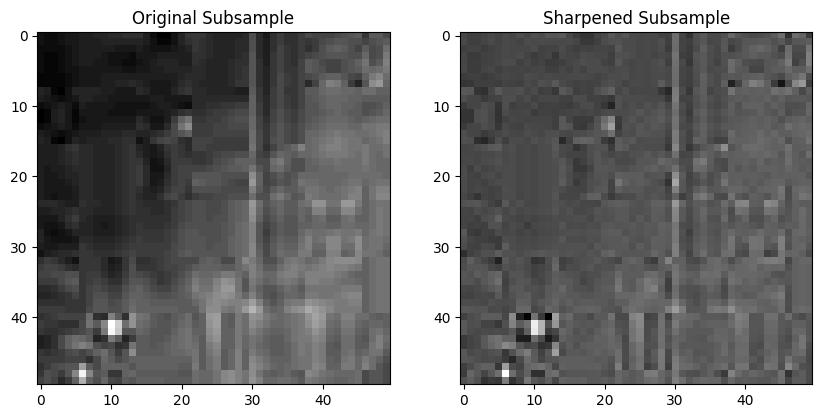

In [9]:
# sharpening
# Kernel that amplifies the central pixel and subtracts the surrounding ones, not considering the corner ones
# So it takes away the color/intensity values of the surrounding pixels from the central one, making edges sharper
# For example, if the central pixel is light and the surrounding ones are dark, the resulting pixel will be even lighter
# If the central pixel is dark and the surrounding ones are light, the resulting pixel will be even darker
# When the surrounding pixels are similar in intensity to the central one, the resulting pixel will be similar to the original central pixel
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
    ], dtype=np.float32)
# Apply the kernel to the image
# ddepth -1 means same depth (= data type, e.g. uint8) as source image
sharpened_image = cv2.filter2D(src=image_subsample, ddepth=-1, kernel=sharpening_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_subsample, cmap='gray')
axes[0].set_title('Original Subsample')
axes[1].imshow(sharpened_image, cmap='gray')
axes[1].set_title('Sharpened Subsample')

Text(0.5, 1.0, 'Edge Detected Subsample Double')

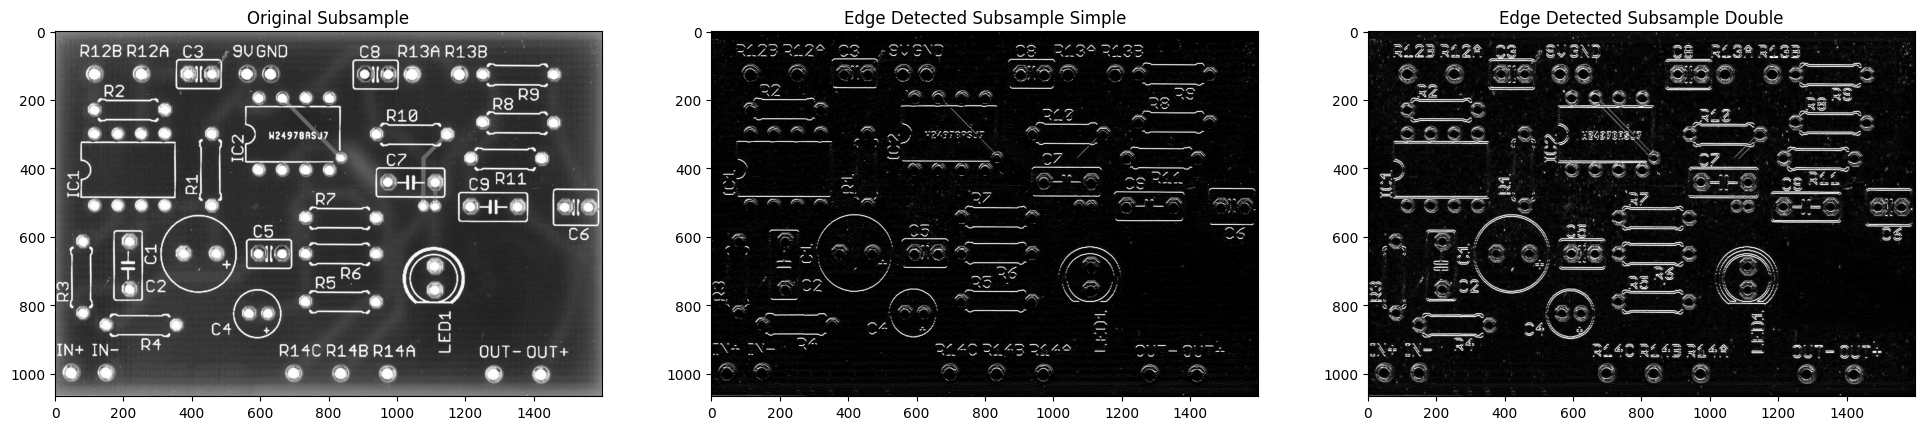

In [10]:
# Horizontaldge detection kernel (vertical Sobel operator)
# Ignores the horizonal line, i.e. the pixel and its left and right neighbors (0 values in the middle row)
# An edge is where there is a strong change in intensity values from top to bottom (in this case)
# if there is no change, the result will be 0 (black)
# if there is a strong change from dark to light, the result will be a high positive value (white)
# if there is a strong change from light to dark, the result will be a high negative value (black, but clipped to 0 in uint8)
# So when using ddepth=-1 (uint8), only one side of the edge is captured (the positive changes) (= 1 line edge)
horizontal_edge_detection_kernel = np.array([
    [-1, -2, -1],
    [0,   0,  0],
    [1,   2,  1]
    ], dtype=np.float32)
# Apply the kernel to the image
# ddepth -1 means same depth (= data type, e.g. uint8) as source image
# so it will clip negative values to 0, i.e. only capture dark to light changes, not light to dark changes
horizontal_edge_detected_image_simple = cv2.filter2D(src=image_gray, ddepth=-1, kernel=horizontal_edge_detection_kernel)

#"proper" way to avoid clipping is to use a higher depth like cv2.CV_16S or cv2.CV_32F
# This approach captures both edges (positive and negative changes, i.e. dark to light AND light to dark), resulting in a 2 line edge
horizontal_edge_detected_image_double = cv2.filter2D(src=image_gray, ddepth=cv2.CV_16S, kernel=horizontal_edge_detection_kernel)
# then convert back to uint8 for display, e.g. using cv2.convertScaleAbs
horizontal_edge_detected_image_double = cv2.convertScaleAbs(horizontal_edge_detected_image_double)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original Subsample')
axes[1].imshow(horizontal_edge_detected_image_simple, cmap='gray')
axes[1].set_title('Edge Detected Subsample Simple')
axes[2].imshow(horizontal_edge_detected_image_double, cmap='gray')
axes[2].set_title('Edge Detected Subsample Double')



Text(0.5, 1.0, 'Edge Detected Subsample')

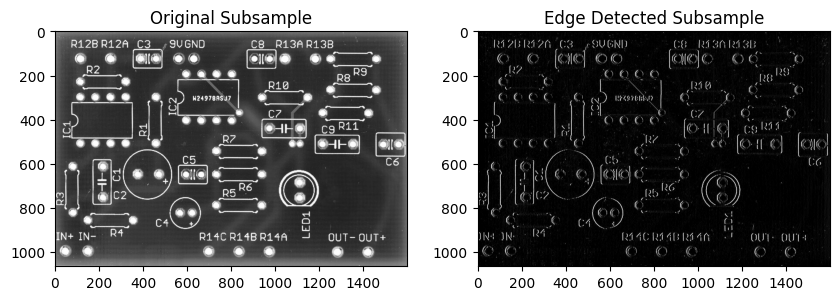

In [11]:
# Vertical edge detection kernel (horizontal Sobel operator)
vertical_edge_detection_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ], dtype=np.float32)
# Apply the kernel to the image
# ddepth -1 means same depth (= data type, e.g. uint8) as source image
vertical_edge_detected_image = cv2.filter2D(src=image_gray, ddepth=-1, kernel=vertical_edge_detection_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original Subsample')
axes[1].imshow(vertical_edge_detected_image, cmap='gray')
axes[1].set_title('Edge Detected Subsample')

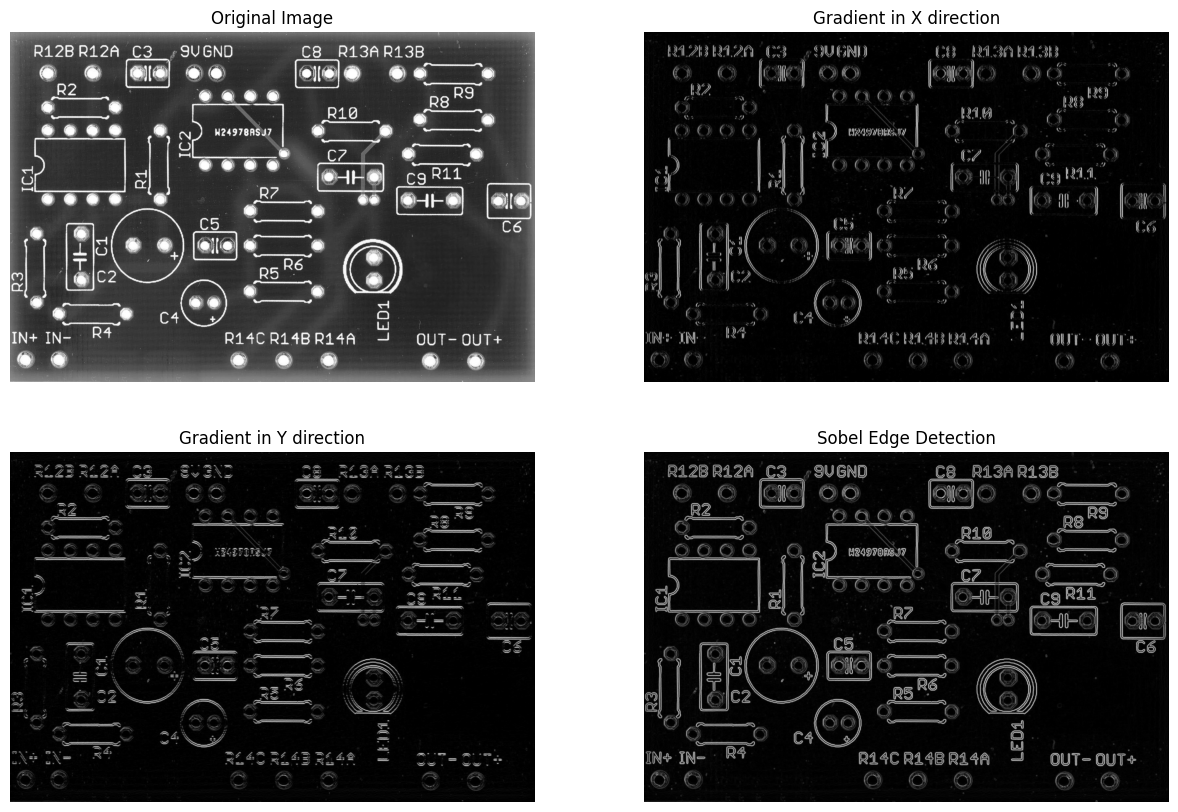

In [12]:
# Combining both Sobel operators to get the gradient magnitude
# cf. https://blog.roboflow.com/edge-detection/

# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(image_gray, (3, 3), 0)

# Sobel operators (no clipping!)
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude (= Euclidean norm), combining both directions. 
# It can't be the simple average, as diagonal edges would cancel out, e.g. Gx = 10, Gy = -10 -> G = 0, but there is an edge, compare with sqrt(10^2 + 10^2) = 14.14
# It can't be a geometric mean, as that would could also cancel out, e.g. sqrt(10 * 0) = 0, but the actual edge strength is (sqrt(10^2 + 10^2) = 14.14)
# cf. error functions in ML
G = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()